### INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE OCCIDENTE

## DEPARTAMENTO DE MATEMATICAS Y FISICA (MAF)









## ESTADISTICA INFERENCIAL
 




## PROYECTO ESTADISTICA INFERENCIAL


## *Integrantes*
- Andrea Santoyo Vega 
- Ernesto Andrés González Lomelí
- Rogelio Adrian Arroyo Valencia
- Christopher Jacob Ahumada Robles 






Profesor: Mtra. ANA LUCIA VAZQUEZ SEGURA

Date: <20  09  2024>


### Tema: 

Para este proyecto estaremos analizando los precios de la acción Intel.  Intel Corporation es una empresa global que se dedica al diseño, desarrollo, fabricación y venta de productos y servicios relacionados con la computación. El tener la información adecuada sobre una acción es de suma importancia por una variedad de razones, especialmente si estás pensando invertir en ella. Conocer los detalles de una acción, en este caso Intel, te permite tomar decisiones informadas. Se puede saber si una acción es buena inversión tomando en cuenta datos como; su historial de precios, sus tendencias en el pasado, su rendimiento financiero, etc.  El propósito de hacer un análisis detallado sobre una acción en el mercado de valores es para tener las herramientas necesarias para evaluar su potencial, tomar decisiones informadas, y gestionar el riesgo.

### Variables (cualitativas y cuantitativas):   

Durante este análisis estaremos comparando estos siguientes datos cuantitativos; el precio de cierre, rendimiento, volatilidad y volumen de la acción en los últimos 4 meses. 
- **Variables Cuantitativas:**
- Precio de la acción: El valor de mercado de una acción de Intel en un momento dado.
- Volumen de negociación: Número de acciones de Intel intercambiadas en un período específico.
- Rendimiento: Cambio porcentual entre los precios de cierre
- Volatilidad: Desviación estándar de los rendimientos del periodo

**Fuente oficial: Yahoo is part of the Yahoo family of brands. (n.d.). https://finance.yahoo.com/quote/INTC/history/**

- Datos que se usarán: Datos históricos de la acción de Intel (INTC) importados directamente de Yahoo finance con respect al periodo 2022-2024


In [2]:
!pip install yfinance

In [4]:
import yfinance as yf
import datetime
ticker,start_date,end_date = 'INTC','2022-01-01','2024-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

data.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,51.650002,53.230000,51.599998,53.209999,49.350487,33857600
2022-01-04,53.570000,53.939999,52.650002,53.139999,49.285561,45681400
2022-01-05,54.189999,56.169998,53.830002,53.869999,49.962616,59109300
2022-01-06,54.610001,54.669998,53.419998,54.009998,50.092464,35757900
2022-01-07,54.189999,54.389999,53.150002,53.439999,49.563801,30717200


### Ahora tomamos solo el volumen y el precio de cierre ajustado

In [7]:
df= data[['Adj Close', 'Volume']].copy()

### Calculamos rendimientos y volatilidad

In [13]:
# Calcular el rendimiento porcentual diario de 'Adj Close'
df['Rendimiento'] = df['Adj Close'].pct_change()

# Calcular la volatilidad como la desviación estándar móvil de los rendimientos (ventana de 20 días)
df['Volatilidad'] = df['Rendimiento'].rolling(window=2).std()


In [15]:
df=df.dropna()

In [16]:
df

,Adj Close,Volume,Rendimiento,Volatilidad
Date,,,,
2022-01-05,49.962616,59109300,0.013737,0.010644
2022-01-06,50.092464,35757900,0.002599,0.007876
2022-01-07,49.563801,30717200,-0.010554,0.009300
2022-01-10,51.205410,49260800,0.033121,0.030883
2022-01-11,51.854645,39795200,0.012679,0.014455
...,...,...,...,...
2023-12-22,47.365639,30053700,0.019541,0.006580
2023-12-26,49.832600,60287400,0.052083,0.023011
2023-12-27,50.089161,52148000,0.005148,0.033188


### Visualizamos los datos 

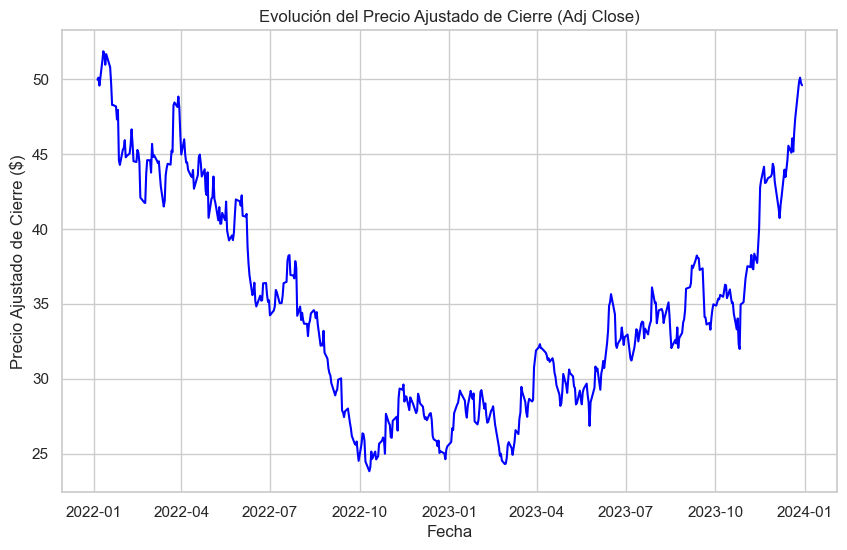

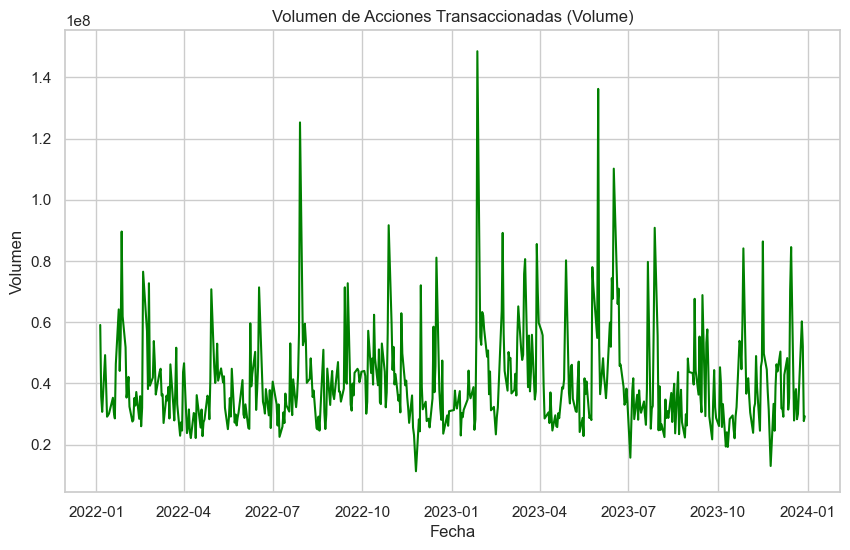

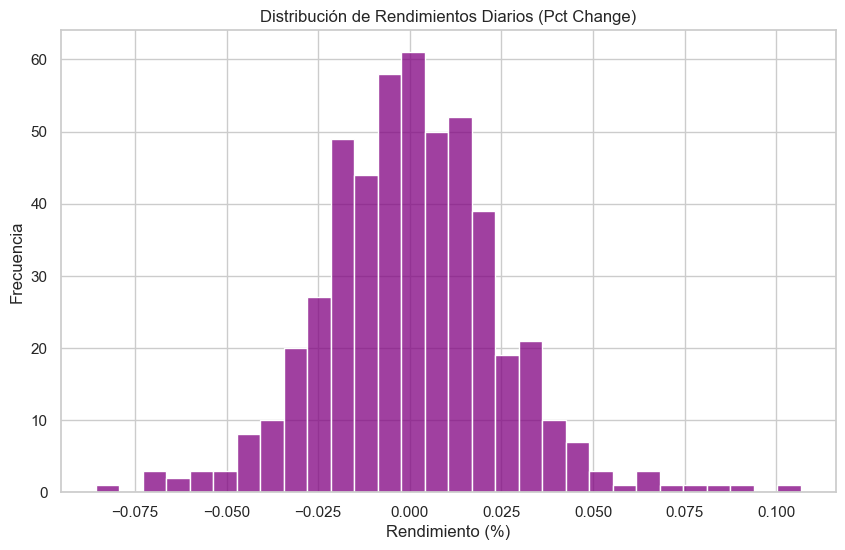

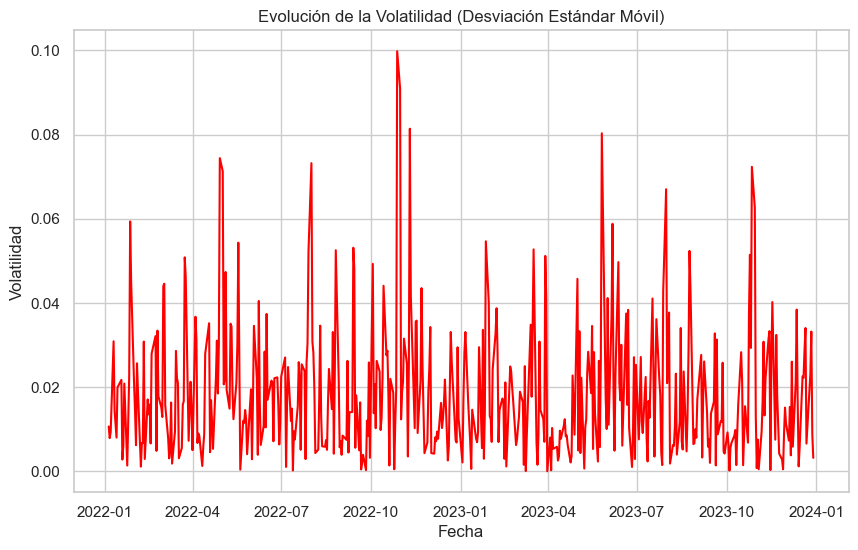

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el estilo de seaborn
sns.set(style="whitegrid")

# 1. Gráfico del precio ajustado de cierre (Adj Close)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], color='blue')
plt.title('Evolución del Precio Ajustado de Cierre (Adj Close)')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado de Cierre ($)')
plt.grid(True)
plt.show()

# 2. Gráfico del Volumen de transacciones (Volume)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], color='green')
plt.title('Volumen de Acciones Transaccionadas (Volume)')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.grid(True)
plt.show()

# 3. Histograma de los Rendimientos (Pct Change)
plt.figure(figsize=(10, 6))
sns.histplot(df['Rendimiento'].dropna(), bins=30, color='purple')
plt.title('Distribución de Rendimientos Diarios (Pct Change)')
plt.xlabel('Rendimiento (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 4. Gráfico de la Volatilidad a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volatilidad'], color='red')
plt.title('Evolución de la Volatilidad (Desviación Estándar Móvil)')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.grid(True)
plt.show()
